In [12]:
# 회귀 분석 예제 - 강우량(RISK_MM) 예측
# 원본 regression 노트북 스타일 유지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/Col/머신러닝 3주차/weatherToX.csv")



In [13]:

# 2. 데이터 확인
print(data.head())
print(data.info())


        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0          NW           30.0         SW  ...          68           29   
1         ENE           39.0          E  ...          80           36   
2          NW           85.0          N  ...          82           69   
3          NW           54.0        WNW  ...          62           56   
4         SSE           50.0        SSE  ...          68           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7    

In [14]:
# 3. 전처리
# 문자형 변수(Label Encoding)
obj_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in obj_cols:
    data[col] = le.fit_transform(data[col].astype(str))

In [15]:
# 결측치 제거 (단순 처리, 필요시 고도화 가능)
data = data.dropna()

In [16]:
# 4. 독립변수(X), 종속변수(y) 정의
X = data.drop(["RISK_MM"], axis=1)
y = data["RISK_MM"]

In [17]:
# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# 6. 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# 7. 예측
y_pred = model.predict(X_test)

In [21]:
# 8. 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 3.3726242602658667
R² Score: 0.1368364917532191


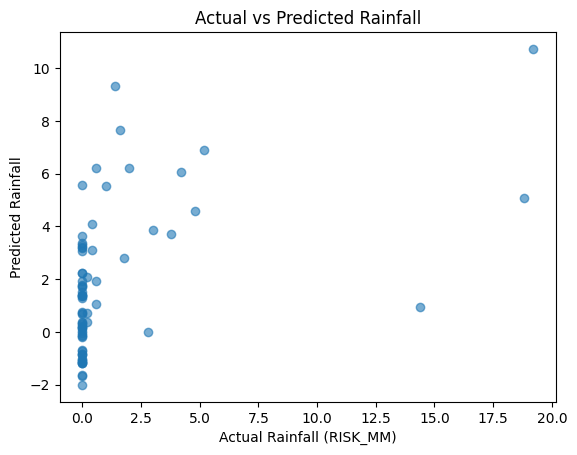

In [22]:
# 9. 실제값 vs 예측값 시각화
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Rainfall (RISK_MM)")
plt.ylabel("Predicted Rainfall")
plt.title("Actual vs Predicted Rainfall")
plt.show()